## Observations and Insights

Inference using the Scatter Plot: As the value of Pearson's r coefficient has come out to be 0.84, this indicates that 
there is a strong positive correlation between the weight of the mouse and the average volume of the tumor, that is, 
mice with higher weight have an higher tumor volume at an average. 
This positive covariance can also be seen from the line of best fit because most of the data points are scattered 
close to the line.

Another inference that can be drawn is using the box plots: Out of the four drug regimen, Ramicane has proven to be most
 effective in reducing the tumor volume, followed by Capomulin.

The third conclusion is derived from the bar graph which is: there were more test done with Ramicane and Capomulin.


## Dependencies and starter code

In [173]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df_mouse_study = pd.merge(mouse_metadata, study_results,on='Mouse ID')
#df_mouse_study.shape
#df_mouse_study.head(5)

# Drop all the duplicates
df_mouse_study.drop_duplicates(subset=None, keep='first', inplace=True)
#df_mouse_study.head(5)

## Summary statistics

In [174]:
# Generate a summary statistics table consisting of the mean, median, variance, standard deviation,
# and SEM of the tumor volume for each drug regimen.
ser_mouseIDCount = df_mouse_study.groupby("Drug Regimen")["Mouse ID"].count()
ser_mouseCountbyGender = df_mouse_study.groupby("Drug Regimen")["Sex"].count()
ser_tumorVolbyDrug = df_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sum()
ser_tumorVolbyDrugMean = round(ser_tumorVolbyDrug/ser_mouseIDCount,2)
ser_tumorVolbyDrugMedian = df_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
ser_tumorVolbyDrugVariance = df_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
ser_tumorVolbyDrugStd = df_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
ser_tumorVolbyDrugSem = df_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
ser_mouseIDCount

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [175]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#combine all the series to create a dataframe
df_drug_regimen_summary = pd.DataFrame({"Mean":ser_tumorVolbyDrugMean,
                                        "Median":ser_tumorVolbyDrugMedian,
                                        "Variance":ser_tumorVolbyDrugVariance ,
                                        "Standard Deviation":ser_tumorVolbyDrugStd,
                                        "SEM":ser_tumorVolbyDrugSem
                                       })
df_drug_regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.59,51.776157,39.290177,6.268188,0.469821
Infubinol,52.88,51.820584,43.128684,6.567243,0.492236
Ketapril,55.24,53.698743,68.553577,8.279709,0.603860
Naftisol,54.33,52.509285,66.173479,8.134708,0.596466
Placebo,54.03,52.288934,61.168083,7.821003,0.581331
Propriva,52.37,50.909965,42.278090,6.502160,0.514041
Ramicane,40.22,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.23,52.431737,59.450562,7.710419,0.573111


## Bar plots

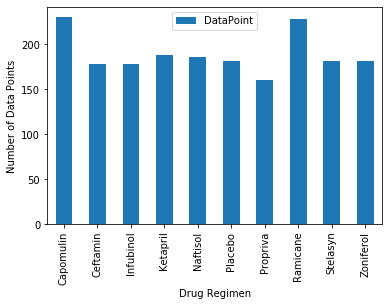

<Figure size 432x288 with 0 Axes>

In [176]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
df_drug_regimen_barplt = pd.DataFrame({"DataPoint":ser_mouseIDCount                                        
                                       })
df_drug_regimen_barplt.head(10)
df_drug_regimen_barplt.plot(kind='bar',y='DataPoint')
plt.ylabel('Number of Data Points')
#plt.title("Datapoints by Drug Regimen")
plt.show()
plt.tight_layout()
#df_drug_regimen_barplt.show()

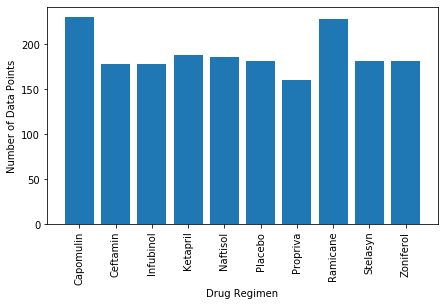

In [177]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set x axis and tick locations
x_axis = np.arange(len(df_drug_regimen_barplt))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(7,4))
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.bar(x_axis, df_drug_regimen_barplt["DataPoint"], align="center")
plt.xticks(tick_locations, df_drug_regimen_barplt.index, rotation="vertical")
plt.show()

## Pie plots

In [178]:
ser_mouseIDCountbyGender = df_mouse_study.groupby("Sex")["Mouse ID"].count()
#ser_mouseIDCountbyGender
df_gender_dist = pd.DataFrame({"Sex":ser_mouseIDCountbyGender                                        
                                       })
df_gender_dist.head()
#plot = df_gender_dist.plot.pie(y='Sex', figsize=(5, 5),autopct='%1.1f%%')



,Sex
Sex,
Female,934
Male,958


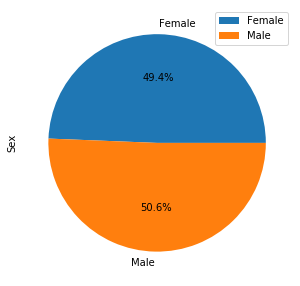

In [179]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot = df_gender_dist.plot.pie(y='Sex', figsize=(5, 5),autopct='%1.1f%%')
#plot.title('Sex')

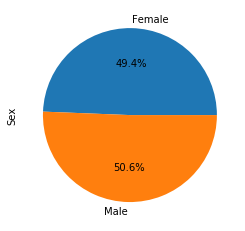

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = df_gender_dist['Sex']
plt.pie(sizes, labels=['Female','Male'], autopct='%1.1f%%' )
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [181]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
#Sort data by Drug Regime, Mouse ID and Timepoint
df_mouse_study_sorted = df_mouse_study.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"],ascending=True)
#df_mouse_study_sorted.head()
# Create a new dataframe by selecting final volume of each mouse
df_mouse_study_maxvol = df_mouse_study_sorted.loc[df_mouse_study_sorted['Timepoint']==45]
df_mouse_study_maxvol.reset_index()
df_mouse_study_maxvol.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1
204,i738,Capomulin,Female,23,20,45,37.311846,2
337,j119,Capomulin,Female,7,23,45,38.125164,1
380,l509,Capomulin,Male,17,21,45,41.483008,3
282,l897,Capomulin,Male,17,19,45,38.846876,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


In [182]:
# Select data for Capomulin regimen and reset index
cap_data_df = df_mouse_study[df_mouse_study['Drug Regimen'].isin(['Capomulin'])]
cap_data_df = cap_data_df.sort_values(['Mouse ID','Timepoint'],ascending=False)
cap_data_df.reset_index()
cap_data_df = cap_data_df.drop_duplicates(subset="Mouse ID", keep="first")
cap_data_df.reset_index()
# for plotting the graph you will need to sort all the data in ascending order
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
#sorted value in ascending order
cap_list = cap_list["Tumor Volume (mm3)"]
# for plotting it together with other drugs , keep this list as a dictionary
dict_forBoxPlot = {}
dict_forBoxPlot.update({'Capomulin':cap_list})

In [183]:
# all calculations for Capomulin
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Capomulin is: {lowerq}")
print(f"The upper quartile of tumor volume for Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr}")
print(f"The the median of Capomulin tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume for Capomulin is: 32.37735684
The upper quartile of tumor volume for Capomulin is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


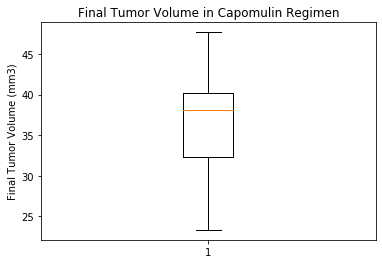

In [184]:
# box plot for Capomulin 
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()


In [185]:
# Select data for Ramicane regimen and reset index
ram_data_df = df_mouse_study[df_mouse_study['Drug Regimen'].isin(['Ramicane'])]
ram_data_df = ram_data_df.sort_values(['Mouse ID','Timepoint'],ascending=False)
ram_data_df.reset_index()
ram_data_df = ram_data_df.drop_duplicates(subset="Mouse ID", keep="first")
ram_data_df.reset_index()
#sorted value in ascending order
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
# for plotting it together with other drugs , keep this list as a dictionary
dict_forBoxPlot.update({'Ramicane':ram_list})



In [186]:
# all calculations for Ramicane
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Ramicane is: {lowerq}")
print(f"The upper quartile of tumor volume for Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr}")
print(f"The the median of Ramicane tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume for Ramicane is: 32.37735684
The upper quartile of tumor volume for Ramicane is: 40.1592203
The interquartile range of Ramicane tumor volume is: 7.781863460000004
The the median of Ramicane tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


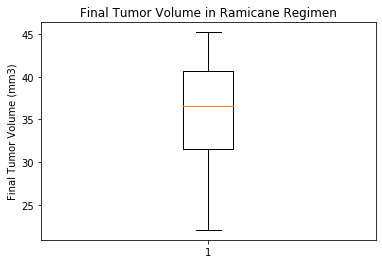

In [187]:
# box plot for Ramicane 
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ram_list)
plt.show()

In [188]:
# Select data for Infubinol regimen and reset index
inf_data_df = df_mouse_study[df_mouse_study['Drug Regimen'].isin(['Infubinol'])]
inf_data_df = inf_data_df.sort_values(['Mouse ID','Timepoint'],ascending=False)
inf_data_df.reset_index()
inf_data_df = inf_data_df.drop_duplicates(subset="Mouse ID", keep="first")
inf_data_df.reset_index()
#sorted value in ascending order
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
#sorted value in ascending order
inf_list = inf_list["Tumor Volume (mm3)"]
# for plotting it together with other drugs , keep this list as a dictionary
dict_forBoxPlot.update({'Infubinol':inf_list})

In [189]:
# all calculations for Infubinol
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Infubinol is: {lowerq}")
print(f"The upper quartile of tumor volume for Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr}")
print(f"The the median of Infubinol tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume for Infubinol is: 32.37735684
The upper quartile of tumor volume for Infubinol is: 40.1592203
The interquartile range of Infubinol tumor volume is: 7.781863460000004
The the median of Infubinol tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


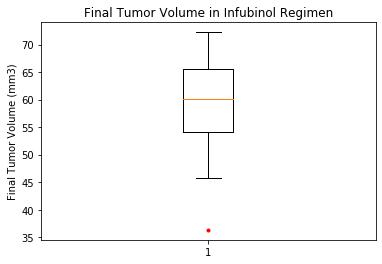

In [190]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(inf_list,sym = 'r.')
plt.show()

In [191]:
# Select data for Ceftamin regimen and reset index
ceft_data_df = df_mouse_study[df_mouse_study['Drug Regimen'].isin(['Ceftamin'])]
ceft_data_df = ceft_data_df.sort_values(['Mouse ID','Timepoint'],ascending=False)
ceft_data_df.reset_index()
ceft_data_df = ceft_data_df.drop_duplicates(subset="Mouse ID", keep="first")
ceft_data_df.reset_index()
#sorted value in ascending order
ceft_list = ceft_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
#sorted value in ascending order
ceft_list = ceft_list["Tumor Volume (mm3)"]
# for plotting it together with other drugs , keep this list as a dictionary
dict_forBoxPlot.update({'Ceftamin':ceft_list})


In [192]:
# all calculations for Ceftamin
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Ceftamin is: {lowerq}")
print(f"The upper quartile of tumor volume for Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr}")
print(f"The the median of Ceftamin tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume for Ceftamin is: 32.37735684
The upper quartile of tumor volume for Ceftamin is: 40.1592203
The interquartile range of Ceftamin tumor volume is: 7.781863460000004
The the median of Ceftamin tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


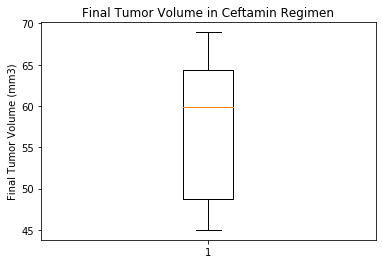

In [193]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ceft_list)
plt.show()


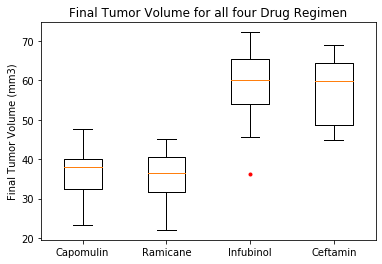

In [194]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(dict_forBoxPlot.values(),sym = 'r.')
ax.set_xticklabels(dict_forBoxPlot.keys())
ax.set_title('Final Tumor Volume for all four Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

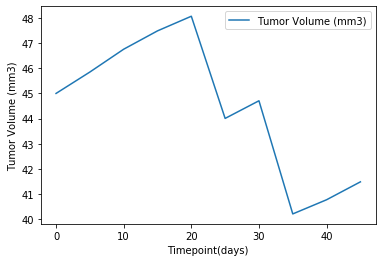

In [195]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Generate a line plot of time point versus tumor volume for **mouse number l509** treated with Capomulin.
# Create a dataframe with just the data asked above
df_l509 = df_mouse_study[df_mouse_study['Mouse ID'].isin(['l509'])]
# draw the line plot
ax = plt.gca()
df_l509.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',ax=ax)
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

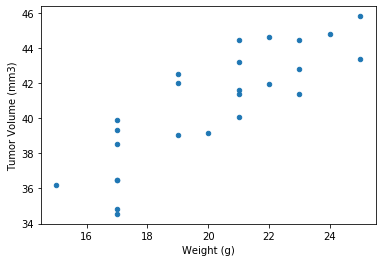

In [196]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df_cap_data = df_mouse_study[df_mouse_study['Drug Regimen'].isin(['Capomulin'])]
df_cap_data_sctr = df_cap_data.groupby('Mouse ID').mean()[['Weight (g)', 'Tumor Volume (mm3)']]
df_cap_data_sctr.plot(kind='scatter',x='Weight (g)',y='Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

The correlation between both factors is 0.84


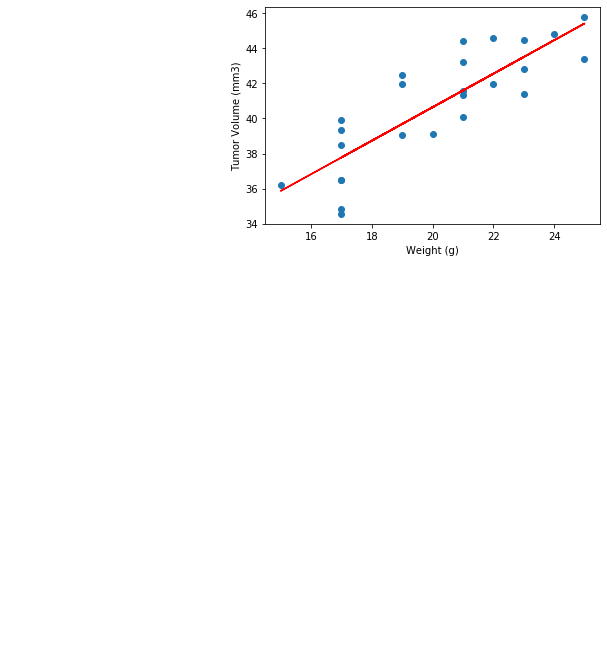

In [197]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Add the linear regression equation and line to plot
x_values = df_cap_data_sctr['Weight (g)']
y_values = df_cap_data_sctr['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()